# _Predicting Flight Delays_

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Reading and cleaning data:

In [97]:
df = pd.read_csv('DataSet.csv')
df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,BRANDED_CODE_SHARE,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,...,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS
0,2022,3,8,18,4,8/18/2022 12:00:00 AM,DL,DL_CODESHARE,19790,4036,...,118.0,1.0,780.0,4,NaN,NaN,NaN,NaN,NaN,0
1,2022,3,8,18,4,8/18/2022 12:00:00 AM,DL,DL_CODESHARE,19790,4037,...,61.0,1.0,296.0,2,NaN,NaN,NaN,NaN,NaN,0
2,2022,3,8,18,4,8/18/2022 12:00:00 AM,DL,DL_CODESHARE,19790,4038,...,50.0,1.0,296.0,2,NaN,NaN,NaN,NaN,NaN,0
3,2022,3,8,18,4,8/18/2022 12:00:00 AM,DL,DL_CODESHARE,19790,4039,...,50.0,1.0,296.0,2,NaN,NaN,NaN,NaN,NaN,0
4,2022,3,8,18,4,8/18/2022 12:00:00 AM,DL,DL_CODESHARE,19790,4040,...,50.0,1.0,284.0,2,29.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613644,2022,3,8,1,1,8/1/2022 12:00:00 AM,UA,UA_CODESHARE,19977,3404,...,46.0,1.0,200.0,1,NaN,NaN,NaN,NaN,NaN,0
613645,2022,3,8,1,1,8/1/2022 12:00:00 AM,UA,UA_CODESHARE,19977,3403,...,33.0,1.0,143.0,1,NaN,NaN,NaN,NaN,NaN,0
613646,2022,3,8,1,1,8/1/2022 12:00:00 AM,UA,UA_CODESHARE,19977,3402,...,109.0,1.0,748.0,3,NaN,NaN,NaN,NaN,NaN,0
613647,2022,3,8,1,1,8/1/2022 12:00:00 AM,UA,UA_CODESHARE,19977,3401,...,55.0,1.0,282.0,2,NaN,NaN,NaN,NaN,NaN,0


Searching for the least amount of unique values in  each column to get rid of them.

In [98]:
print(df.nunique())

YEAR                         1
QUARTER                      1
MONTH                        1
DAY_OF_MONTH                31
DAY_OF_WEEK                  7
FL_DATE                     31
MKT_UNIQUE_CARRIER          10
BRANDED_CODE_SHARE          14
MKT_CARRIER_AIRLINE_ID      10
MKT_CARRIER_FL_NUM        6278
TAIL_NUM                  5645
OP_CARRIER_FL_NUM         6278
ORIGIN_AIRPORT_ID          368
ORIGIN_AIRPORT_SEQ_ID      368
ORIGIN_CITY_MARKET_ID      344
ORIGIN                     368
ORIGIN_CITY_NAME           362
ORIGIN_STATE_ABR            52
ORIGIN_STATE_NM             52
ORIGIN_WAC                  52
DEST_AIRPORT_ID            368
DEST_AIRPORT_SEQ_ID        368
DEST_CITY_MARKET_ID        344
DEST                       368
DEST_CITY_NAME             362
DEST_STATE_ABR              52
DEST_STATE_NM               52
DEST_WAC                    52
CRS_DEP_TIME              1194
DEP_TIME                  1414
DEP_DELAY                 1130
DEP_DELAY_NEW             1089
DEP_DEL1

In [99]:
df.drop(['YEAR', 'QUARTER', 'MONTH', 'DUP', 'CANCELLED', 'DEP_DEL15', 'ARR_DEL15', 'FLIGHTS', 'DIV_AIRPORT_LANDINGS'],
        axis=1, inplace=True)

As we can tell there are a few columns that describe almost the same thing.
We want to drop them as well.

In [100]:
df.drop(['FL_DATE', 'MKT_UNIQUE_CARRIER', 'BRANDED_CODE_SHARE', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
         'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
         'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'ARR_DELAY_GROUP',
         'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM',
         'DEST_WAC',
         'DEP_DELAY', 'DEP_TIME', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'ARR_TIME_BLK', 'ARR_DELAY_NEW',
         'DISTANCE_GROUP'], axis=1, inplace=True)
df.head(5)

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,18,4,19790,4036,12197,10397,1240,0.0,13.0,1248.0,...,-4.0,140.0,141.0,118.0,780.0,NaN,NaN,NaN,NaN,NaN
1,18,4,19790,4037,11433,10408,2146,0.0,20.0,2158.0,...,0.0,78.0,86.0,61.0,296.0,NaN,NaN,NaN,NaN,NaN
2,18,4,19790,4038,11433,10408,1555,0.0,15.0,1606.0,...,-19.0,84.0,69.0,50.0,296.0,NaN,NaN,NaN,NaN,NaN
3,18,4,19790,4039,10408,11433,1755,0.0,18.0,1812.0,...,-13.0,89.0,77.0,50.0,296.0,NaN,NaN,NaN,NaN,NaN
4,18,4,19790,4040,11898,13487,1311,41.0,9.0,1401.0,...,29.0,75.0,63.0,50.0,284.0,29.0,0.0,0.0,0.0,0.0


Looking for duplicated rows, to get rid of them.

In [101]:
df[df.duplicated()]

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY


No duplicated rows were found.

Checkin missing values

In [102]:
df.isnull().sum()

DAY_OF_MONTH                   0
DAY_OF_WEEK                    0
MKT_CARRIER_AIRLINE_ID         0
MKT_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID              0
DEST_AIRPORT_ID                0
CRS_DEP_TIME                   0
DEP_DELAY_NEW              14850
TAXI_OUT                   15432
WHEELS_OFF                 15432
WHEELS_ON                  15616
TAXI_IN                    15616
CRS_ARR_TIME                   0
ARR_TIME                   15616
ARR_DELAY                  17365
CRS_ELAPSED_TIME               0
ACTUAL_ELAPSED_TIME        17365
AIR_TIME                   17365
DISTANCE                       0
CARRIER_DELAY             481108
WEATHER_DELAY             481108
NAS_DELAY                 481108
SECURITY_DELAY            481108
LATE_AIRCRAFT_DELAY       481108
dtype: int64

Filling NaN values with zeros in each of the delay reason columns.

In [103]:
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

We want to merge 5 columns, giving each reason a number 1-5: <br>
- 'CARRIER_DELAY'
- 'WEATHER_DELAY'
- 'NAS_DELAY'
- 'SECURITY_DELAY'
- 'LATE_AIRCRAFT_DELAY'
<br> into one column __'DELAY_REASON'__. <br>
0 defines the flights that didn't get delayed.

In [104]:
conditions = [(df['CARRIER_DELAY'] != 0), (df['WEATHER_DELAY'] != 0), (df['NAS_DELAY'] != 0),
              (df['SECURITY_DELAY'] != 0), (df['LATE_AIRCRAFT_DELAY']) != 0]

values = [1, 2, 3, 4, 5]
df['DELAY_REASON'] = np.select(conditions, values)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAY_REASON
0,18,4,19790,4036,12197,10397,1240,0.0,13.0,1248.0,...,140.0,141.0,118.0,780.0,0.0,0.0,0.0,0.0,0.0,0
1,18,4,19790,4037,11433,10408,2146,0.0,20.0,2158.0,...,78.0,86.0,61.0,296.0,0.0,0.0,0.0,0.0,0.0,0
2,18,4,19790,4038,11433,10408,1555,0.0,15.0,1606.0,...,84.0,69.0,50.0,296.0,0.0,0.0,0.0,0.0,0.0,0
3,18,4,19790,4039,10408,11433,1755,0.0,18.0,1812.0,...,89.0,77.0,50.0,296.0,0.0,0.0,0.0,0.0,0.0,0
4,18,4,19790,4040,11898,13487,1311,41.0,9.0,1401.0,...,75.0,63.0,50.0,284.0,29.0,0.0,0.0,0.0,0.0,1


Dropping the columns:
- 'CARRIER_DELAY'
- 'WEATHER_DELAY'
- 'NAS_DELAY'
- 'SECURITY_DELAY'
- 'LATE_AIRCRAFT_DELAY'

In [105]:
df.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1, inplace=True)

Prepare the label 'ARR_DELAY' we want to predict.
- Less than 15 minutes: 0
- 15 minutes to 30 minutes: 1
- 30 minutes to 45 minutes: 2
- 45 minutes to 60 minutes: 3
- more than 60 minutes: 4

In [106]:
delay = []
for flight_del in df['ARR_DELAY']:
    if flight_del > 60:
        delay.append(4)
    elif flight_del > 45:
        delay.append(3)
    elif flight_del > 30:
        delay.append(2)
    elif flight_del > 15:
        delay.append(1)
    else:
        delay.append(0)
df['ARR_DELAY'] = delay
df.rename(columns={'ARR_DELAY': 'DELAY'}, inplace=True)

delay0 = []
delay1 = []
delay2 = []
delay3 = []
delay4 = []
for flight_del in df['DELAY']:
    if flight_del == 4:
        delay4.append(1)
        delay0.append(0)
        delay1.append(0)
        delay2.append(0)
        delay3.append(0)
    if flight_del == 3:
        delay4.append(0)
        delay0.append(0)
        delay1.append(0)
        delay2.append(0)
        delay3.append(1)
    if flight_del == 2:
        delay4.append(0)
        delay0.append(0)
        delay1.append(0)
        delay2.append(1)
        delay3.append(0)
    if flight_del == 1:
        delay4.append(0)
        delay0.append(0)
        delay1.append(1)
        delay2.append(0)
        delay3.append(0)
    if flight_del == 0:
        delay4.append(0)
        delay0.append(1)
        delay1.append(0)
        delay2.append(0)
        delay3.append(0)
df['DELAY_0'] = delay0
df['DELAY_1'] = delay1
df['DELAY_2'] = delay2
df['DELAY_3'] = delay3
df['DELAY_4'] = delay4

df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,MKT_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_REASON,DELAY_0,DELAY_1,DELAY_2,DELAY_3,DELAY_4
0,18,4,19790,4036,12197,10397,1240,0.0,13.0,1248.0,...,140.0,141.0,118.0,780.0,0,1,0,0,0,0
1,18,4,19790,4037,11433,10408,2146,0.0,20.0,2158.0,...,78.0,86.0,61.0,296.0,0,1,0,0,0,0
2,18,4,19790,4038,11433,10408,1555,0.0,15.0,1606.0,...,84.0,69.0,50.0,296.0,0,1,0,0,0,0
3,18,4,19790,4039,10408,11433,1755,0.0,18.0,1812.0,...,89.0,77.0,50.0,296.0,0,1,0,0,0,0
4,18,4,19790,4040,11898,13487,1311,41.0,9.0,1401.0,...,75.0,63.0,50.0,284.0,1,0,1,0,0,0


In [107]:
df.drop(['ARR_TIME', 'ACTUAL_ELAPSED_TIME'], axis=1, inplace=True)

In [108]:
df = df.dropna()
df.isnull().sum()

DAY_OF_MONTH              0
DAY_OF_WEEK               0
MKT_CARRIER_AIRLINE_ID    0
MKT_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID         0
DEST_AIRPORT_ID           0
CRS_DEP_TIME              0
DEP_DELAY_NEW             0
TAXI_OUT                  0
WHEELS_OFF                0
WHEELS_ON                 0
TAXI_IN                   0
CRS_ARR_TIME              0
DELAY                     0
CRS_ELAPSED_TIME          0
AIR_TIME                  0
DISTANCE                  0
DELAY_REASON              0
DELAY_0                   0
DELAY_1                   0
DELAY_2                   0
DELAY_3                   0
DELAY_4                   0
dtype: int64

In [109]:
df.dtypes

DAY_OF_MONTH                int64
DAY_OF_WEEK                 int64
MKT_CARRIER_AIRLINE_ID      int64
MKT_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID           int64
DEST_AIRPORT_ID             int64
CRS_DEP_TIME                int64
DEP_DELAY_NEW             float64
TAXI_OUT                  float64
WHEELS_OFF                float64
WHEELS_ON                 float64
TAXI_IN                   float64
CRS_ARR_TIME                int64
DELAY                       int64
CRS_ELAPSED_TIME          float64
AIR_TIME                  float64
DISTANCE                  float64
DELAY_REASON                int32
DELAY_0                     int64
DELAY_1                     int64
DELAY_2                     int64
DELAY_3                     int64
DELAY_4                     int64
dtype: object

In [110]:
# df = df.sample(n=10000)

In [111]:
X = df.drop(['DELAY', 'DELAY_0', 'DELAY_1', 'DELAY_2', 'DELAY_3', 'DELAY_4'], axis=1)
Y = df[['DELAY_0', 'DELAY_1', 'DELAY_2', 'DELAY_3', 'DELAY_4']]
print("X shape: ", X.shape, "\nY shape: ", Y.shape)

X shape:  (596284, 17) 
Y shape:  (596284, 5)


In [112]:
smote = SMOTE()
X_data, Y_data = smote.fit_resample(X.to_numpy(), Y.to_numpy())

c:\users\kuro\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2 3 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [113]:
scale = StandardScaler()
X_data = scale.fit_transform(X_data)
X_data

array([[ 3.57628255e-01,  8.44320197e-02, -4.92004373e-02, ...,
         8.63704857e-02, -4.57426485e-02, -1.20354279e+00],
       [ 3.57628255e-01,  8.44320197e-02, -4.92004373e-02, ...,
        -7.57033597e-01, -8.84034352e-01, -1.20354279e+00],
       [ 3.57628255e-01,  8.44320197e-02, -4.92004373e-02, ...,
        -9.19795788e-01, -8.84034352e-01, -1.20354279e+00],
       ...,
       [-1.09139018e+00,  2.08009746e-01,  1.14406780e-01, ...,
        -9.87104214e-02, -2.86491712e-01, -1.47949087e-01],
       [-1.95478350e-01, -8.36289733e-01,  1.30645811e-03, ...,
         4.74943965e-01,  4.89447716e-01,  2.48609272e-01],
       [-5.50941689e-01,  1.25759030e-01, -1.38594960e+00, ...,
        -9.97745982e-01, -8.97908819e-01, -4.44437633e-01]])

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)
Y_train = Y_train.reshape((Y_train.shape[0], 5))
Y_val = Y_val.reshape((Y_val.shape[0], 5))
Y_test = Y_test.reshape((Y_test.shape[0], 5))

In [115]:
num_classes = 5 #classes to predict

### ANN Model

In [116]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model_ann = Sequential()
model_ann.add(Dense(512, input_dim=17)) #dense layers
model_ann.add(Activation('relu'))
model_ann.add(Dense(256))
model_ann.add(Activation('relu')) #activations
model_ann.add(Dense(128))
model_ann.add(Activation('relu'))
model_ann.add(Dropout(0.3)) #dropout layers
model_ann.add(Dense(64))
model_ann.add(Activation('relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(num_classes,activation='softmax')) 

### Optimizer functions

In [117]:
import tensorflow as tf

opt = keras.optimizers.Adam(learning_rate=0.001)
model_ann.compile(loss="categorical_crossentropy", optimizer=opt, metrics="acc")
history = model_ann.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val), batch_size=128)

Epoch 1/20
10963/10963 [==============================] - 70s 6ms/step - loss: 0.0836 - acc: 0.9697 - val_loss: 0.0384 - val_acc: 0.9866
Epoch 2/20
10963/10963 [==============================] - 60s 5ms/step - loss: 0.0432 - acc: 0.9846 - val_loss: 0.0353 - val_acc: 0.9868
Epoch 3/20
10963/10963 [==============================] - 57s 5ms/step - loss: 0.0367 - acc: 0.9869 - val_loss: 0.0262 - val_acc: 0.9902
Epoch 4/20
10963/10963 [==============================] - 59s 5ms/step - loss: 0.0329 - acc: 0.9880 - val_loss: 0.0341 - val_acc: 0.9868
Epoch 5/20
10963/10963 [==============================] - 63s 6ms/step - loss: 0.0306 - acc: 0.9889 - val_loss: 0.0201 - val_acc: 0.9922
Epoch 6/20
10963/10963 [==============================] - 62s 6ms/step - loss: 0.0288 - acc: 0.9896 - val_loss: 0.0287 - val_acc: 0.9889
Epoch 7/20
10963/10963 [==============================] - 81s 7ms/step - loss: 0.0271 - acc: 0.9902 - val_loss: 0.0196 - val_acc: 0.9926
Epoch 8/20
10963/10963 [=================

### Plot metrics

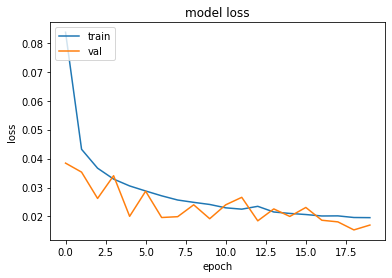

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

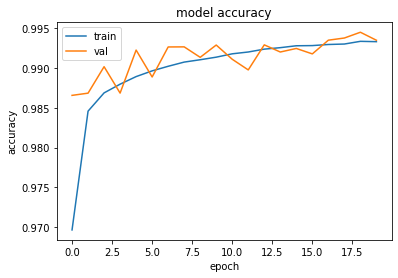

In [119]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [120]:
y_preds = model_ann.predict(X_test) #predict test data

### Metric model with confusion matrix and classification report

In [121]:
loss_test, acc_test = model_ann.evaluate(X_test, Y_test)

14617/14617 [==============================] - 27s 2ms/step - loss: 0.0173 - acc: 0.9935


In [122]:
cm_ann = metrics.confusion_matrix(Y_test.argmax(axis=1), y_preds.argmax(axis=1))

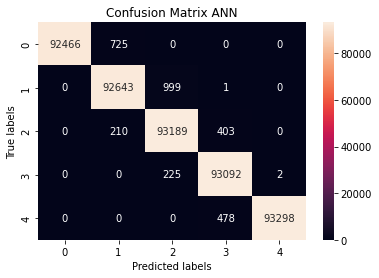

In [123]:
ax= plt.subplot()
sns.heatmap(cm_ann, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix ANN'); 

In [124]:
print("Report model ANN\n")
print(classification_report(y_preds.argmax(axis=1), Y_test.argmax(axis=1)))

Report model ANN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     92466
           1       0.99      0.99      0.99     93578
           2       0.99      0.99      0.99     94413
           3       1.00      0.99      0.99     93974
           4       0.99      1.00      1.00     93300

    accuracy                           0.99    467731
   macro avg       0.99      0.99      0.99    467731
weighted avg       0.99      0.99      0.99    467731

